In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
r'/content/Titanic-Dataset.csv'
df = pd.read_csv(path)


In [29]:
df_titanic = pd.read_csv('/content/Titanic-Dataset.csv')
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
#проверим значения
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


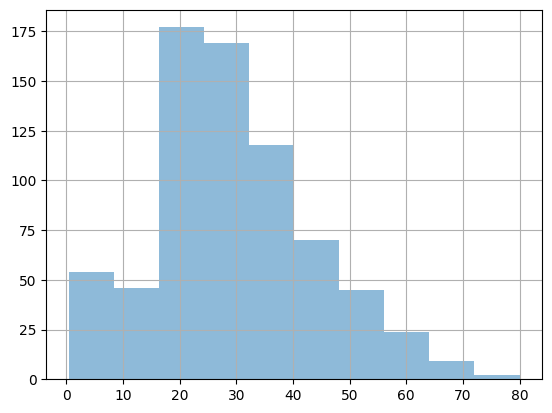

In [31]:
#определим среднее распределение по возрасту на титанике
hist = df_titanic['Age'].hist(alpha = 0.5)

In [32]:
#определим количество уникальных значений в каждом столбце
[f"Column {col} has {len(df_titanic[col].unique())} unique values" for col in df_titanic.columns]

['Column PassengerId has 891 unique values',
 'Column Survived has 2 unique values',
 'Column Pclass has 3 unique values',
 'Column Name has 891 unique values',
 'Column Sex has 2 unique values',
 'Column Age has 89 unique values',
 'Column SibSp has 7 unique values',
 'Column Parch has 7 unique values',
 'Column Ticket has 681 unique values',
 'Column Fare has 248 unique values',
 'Column Cabin has 148 unique values',
 'Column Embarked has 4 unique values']

In [33]:
#gосчитаем количество NaN-values в каждом столбце
df_titanic.isna().apply(lambda x: x.sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#убираем лишние текстовые столбцы
for col in df_titanic.columns:
  if df_titanic[col].dtype not in [np.float64, np.int64]:
    df_titanic.drop(col, axis = 1, inplace= True)
df_titanic.fillna(df_titanic['Age'].median(), inplace = True)
df_titanic_nans = df_titanic.dropna()

In [35]:
#проверяем
df_titanic_nans.isna().apply(lambda x: x.sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [36]:
#коррерируем
df_titanic_nans.drop('Survived', axis = 1).apply(lambda x: x.corr(df_titanic_nans.Survived))

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

Анализируем:
1. Пассажиры с высшем классом обслуживания выживают чаще.
2. выживают как и молодые за счет возраста и старые за счет того, что были куплены билеты первого класса, что помогло им быть спасеным первыми.
3. Цем выше стоимость билета, тем выше выживаемость, но и количество билетов первого класса было меньшем, чем классов ниже.

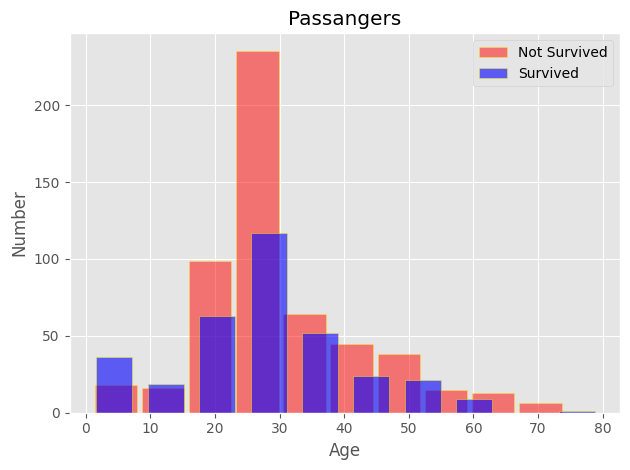

In [37]:
df_titanic_groups = df_titanic_nans.groupby('Survived')
groups = df_titanic_groups.groups.keys()

plt.style.use('ggplot')

plt.title('Passangers')

plt.hist(df_titanic_groups.get_group(0)['Age'], edgecolor='yellow',color='red',rwidth=0.9,alpha=0.5,label='Not Survived')
plt.hist(df_titanic_groups.get_group(1)['Age'], edgecolor='yellow',color='blue',rwidth=0.7,alpha=0.6,label='Survived')

plt.legend(loc='upper right')

plt.xlabel('Age')
plt.ylabel('Number')

plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

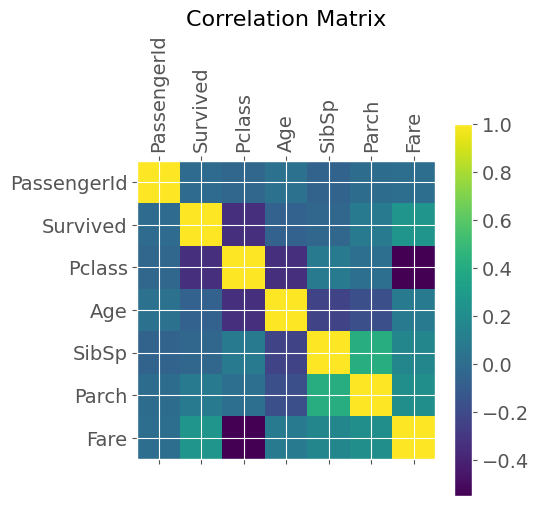

In [38]:
columns = df_titanic_nans.columns
n_ticks = range(len(df_titanic_nans.columns))
fig = plt.figure()
plt.matshow(df_titanic_nans.corr())
plt.xticks(n_ticks,columns, fontsize=14, rotation=90)
plt.yticks(n_ticks,columns, fontsize=14, rotation=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);